#### ĐẶT VÀ TRẢ LỜI CÁC CÂU HỎI CÓ Ý NGHĨA

+ Thêm các thư viện cần thiết và đọc file "chotot.csv" để lấy dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [2]:
house_df = pd.read_csv('chotot-final.csv')
house_df.head()

,DiaChi,GiaBan,DuAn,DienTich,TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem
0,"Đường Huy Cận, Phường Phước Long B (Quận 9 cũ)...","2,35 tỷ",The Art,66 m²,Chưa bàn giao,"35,61 triệu/m²",2 phòng,2 phòng,8.0,Đã có sổ,Nội thất cao cấp,Tây Bắc,Đông Bắc,NaN
1,"số 88, số 88 Đường N1, Phường Sơn Kỳ, Quận Tân...","3,42 tỷ",Celadon City,71 m²,Đã bàn giao,"48,17 triệu/m²",2 phòng,2 phòng,NaN,Đang chờ sổ,Nội thất cao cấp,NaN,NaN,NaN
2,"Võ Văn Kiệt, Phường An Lạc, Quận Bình Tân, Tp ...","2,4 tỷ",Akari City,56 m²,Đã bàn giao,"42,86 triệu/m²",2 phòng,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Bát Nàn, Phường Thạnh Mỹ Lợi (Quận 2 cũ), Thàn...","7,5 tỷ",One Verandah Mapletree,107 m²,Đã bàn giao,"70,09 triệu/m²",3 phòng,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Võ Văn Kiệt, Phường An Lạc, Quận Bình Tân, Tp ...","3,1 tỷ",Akari City,75 m²,Chưa bàn giao,"41,33 triệu/m²",2 phòng,2 phòng,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#xử lý cho cột 'Gia/m2'.
list_val1=house_df['Gia/m2'].values.tolist()
list_unit1=[]
for i in list_val1:
    list_unit1.append(i.split(" ",1)[1])
    
#Xử lý cho cột 'DienTich'
list_val2=house_df['DienTich'].values.tolist()
list_unit2=[]
for i in list_val2:
    list_unit2.append(i.split(" ",1)[1])  
    
#Xử lý cho cột 'GiaBan'
list_val3=house_df['GiaBan'].values.tolist()
list_unit3=[]
for i in list_val3:
    list_unit3.append(i.split(" ",1)[1])

In [4]:
#xử lý cho 4 cột 'GiaBan', 'DienTich', 'PhongNgu', 'PhongVeSinh'.
vals=house_df[['GiaBan', 'DienTich', 'PhongNgu', 'PhongVeSinh']].values
list_vals=vals.tolist()
list_num_vals=[[str(float(str(l).split()[0].replace(',','.'))/(10**3)) if (len(str(l).split())>1) and ('triệu' in str(l).split()[1])
                else str(l).split()[0].replace(',','.') for l in lv] for lv in list_vals]
house_df[['GiaBan', 'DienTich', 'PhongNgu', 'PhongVeSinh']]=list_num_vals
#xử lý cho cột 'Gia/m2'.
list_val=house_df['Gia/m2'].values.tolist()
list_num_val=[str(float(str(l).split()[0].replace(',','.'))*(10**3)) if (len(str(l).split())>1) and ('tỷ' in str(l).split()[1])
                else str(l).split()[0].replace(',','.') for l in list_val]
house_df['Gia/m2']=list_num_val
house_df[['GiaBan', 'DienTich', 'Gia/m2', 'PhongNgu', 'PhongVeSinh']]=house_df[['GiaBan', 'DienTich', 'Gia/m2', 'PhongNgu', 'PhongVeSinh']].astype('float64')
house_df.head(3)

,DiaChi,GiaBan,DuAn,DienTich,TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem
0,"Đường Huy Cận, Phường Phước Long B (Quận 9 cũ)...",2.35,The Art,66.0,Chưa bàn giao,35.61,2.0,2.0,8.0,Đã có sổ,Nội thất cao cấp,Tây Bắc,Đông Bắc,NaN
1,"số 88, số 88 Đường N1, Phường Sơn Kỳ, Quận Tân...",3.42,Celadon City,71.0,Đã bàn giao,48.17,2.0,2.0,NaN,Đang chờ sổ,Nội thất cao cấp,NaN,NaN,NaN
2,"Võ Văn Kiệt, Phường An Lạc, Quận Bình Tân, Tp ...",2.40,Akari City,56.0,Đã bàn giao,42.86,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = house_df.copy()
addr=[]
for i in range(0,len(df['DiaChi'])):
    a= df.DiaChi[i].split(',')
    temp=[]
    for j in a:
        if 'Huyện' in j:
            temp.append(j)
        if 'Quận' in j:
            temp.append(j)
        if 'Thủ Đức' in j:
            temp.append(j)
    addr=addr+[temp[-1]]
house_df['Quan']=addr
house_df.head()

,DiaChi,GiaBan,DuAn,DienTich,TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem,Quan
0,"Đường Huy Cận, Phường Phước Long B (Quận 9 cũ)...",2.35,The Art,66.0,Chưa bàn giao,35.61,2.0,2.0,8.0,Đã có sổ,Nội thất cao cấp,Tây Bắc,Đông Bắc,NaN,Thành phố Thủ Đức
1,"số 88, số 88 Đường N1, Phường Sơn Kỳ, Quận Tân...",3.42,Celadon City,71.0,Đã bàn giao,48.17,2.0,2.0,NaN,Đang chờ sổ,Nội thất cao cấp,NaN,NaN,NaN,Quận Tân Phú
2,"Võ Văn Kiệt, Phường An Lạc, Quận Bình Tân, Tp ...",2.40,Akari City,56.0,Đã bàn giao,42.86,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quận Bình Tân
3,"Bát Nàn, Phường Thạnh Mỹ Lợi (Quận 2 cũ), Thàn...",7.50,One Verandah Mapletree,107.0,Đã bàn giao,70.09,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thành phố Thủ Đức
4,"Võ Văn Kiệt, Phường An Lạc, Quận Bình Tân, Tp ...",3.10,Akari City,75.0,Chưa bàn giao,41.33,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Quận Bình Tân


**Câu 1**: Số phòng ngủ phổ biến của các căn hộ chung cư được rao bán là bao nhiêu?

+ Các căn hộ chung cư được thiết kế rất đa dạng tùy nhu cầu sử dụng của từng người mà nó sẽ có từ 1 phòng ngủ cho đến 10 phòng ngủ cho mỗi căn. 
+ Thế nên khi trả lời được câu hỏi này ta sẽ phần nào biết được hiện nay đâu sẽ là loại hình căn hộ có số phòng ngủ phổ biển nhất? Và nó sẽ phù hợp cho các gia đình có bao nhiêu thành viên trong gia đình? Từ đây chúng ta sẽ nắm bắt được nhu cầu thị trường nhà ở và có thể đầu tư sinh lời từ lĩnh vực này.


Text(0, 0.5, 'Số căn')

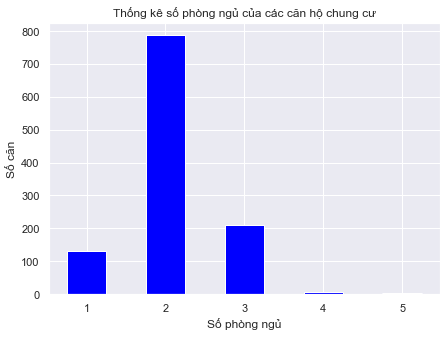

In [6]:
#Vẽ biểu đồ thống kê số phòng ngủ của các căn hộ
data = house_df['PhongNgu'].value_counts(dropna=True, sort=True)
p=data.index
f=data.values
plt.figure(figsize=(7, 5))
plt.bar(p,f,color='blue',width=0.5)
plt.title("Thống kê số phòng ngủ của các căn hộ chung cư")
plt.xlabel('Số phòng ngủ')
plt.ylabel('Số căn')

**Nhận xét:** Đa số các căn hộ được rao bán có số phòng ngủ là 2. Với số lượng phòng ngủ là 2 thì sẽ phù hợp nhất cho các gia đình có từ 2 đến 4 thành viên ở. Và nó cũng phù hợp với xu hướng hình thái của các gia đình hiện nay là gia đình hạt nhât (2 thế hệ) 

**Câu 2:** Các căn hộ chung cư được rao bán có diện tích bao nhiêu là phổ biến nhất?

+ Thông thường tùy vào nhu cầu sử dụng mà người mua sẽ lựa chọn diện tích căn hộ cần mua cho phù hợp. 
+ Trả lời được câu hỏi này ta sẽ biết được diện tích phổ biến của các căn hộ hiện nay là bao nhiêu và nó có phù hợp với nhu cầu của thị trường hiện nay. 


In [7]:
data = house_df['DienTich'].value_counts(dropna=True, sort=True)
data=data.sort_index()
p=data.index
f=data.values

In [8]:
#Hàm đếm số căn hộ theo nhóm diện tích
def by_Area(x,y):
    counter=0
    for i in p:
        Area=i
        if((Area>=x)&(Area<y)):
            counter=counter+data[i]
    return counter

In [9]:
#Chia diện tích các căn hộ theo từng nhóm và đếm số căn hộ cho từng nhóm
A_index=[(0,25),(25,50),(50,75),(75,100),(100,125),(125,150),(150,175),(175,200),(200,225),(225,250),(250,275),(275,300),(300,25),(325,350),(350,375),(375,400)]
A_data=[]
for (x,y) in A_index:
    counter=by_Area(x,y)
    A_data.append(counter)
A_index=[('0-25'),('25-50'),('50-75'),('75-100'),('100-125'),('125-150'),('150-175'),('175-200'),('200-225'),('225-250'),('250-275'),('275-300'),('300-25'),('325-350'),('350-375'),('375-400')]

Text(0, 0.5, 'Số căn')

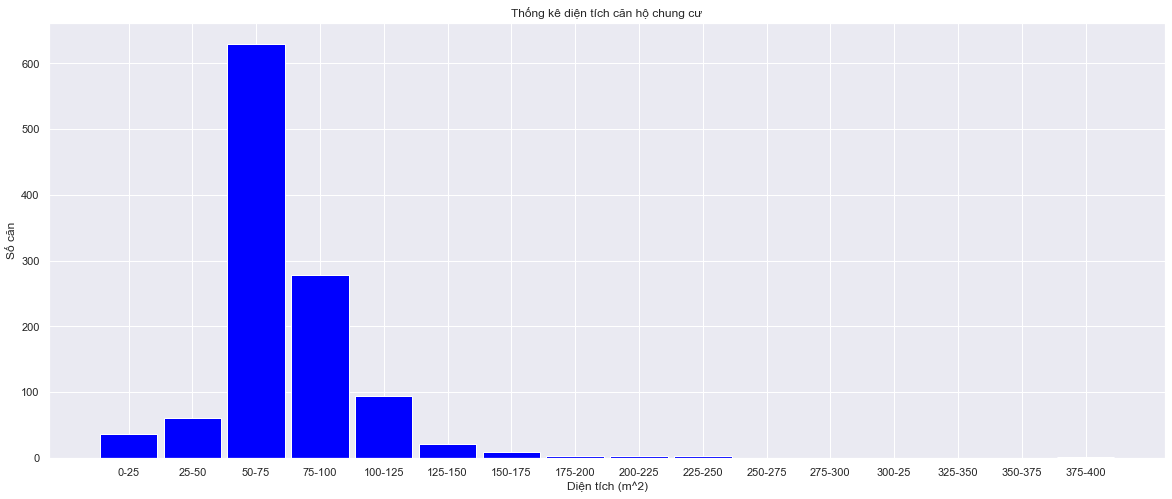

In [10]:
#Vẽ biểu đồ thống kê theo diện tích
plt.figure(figsize=(20, 8))
plt.bar(A_index,A_data,color='blue',width=0.9)
plt.title("Thống kê diện tích căn hộ chung cư")
plt.xlabel('Diện tích (m^2)')
plt.ylabel('Số căn')

**Nhận xét:** Qua biểu đồ ta có thể thấy diện tích của các căn hộ chung cư rao bán phố biến nhất sẽ chủ yếu dao động từ 50 cho đến 100 m^2 cho 1 căn. Với diện tích như thế sẽ phù hợp với quy định của Nhà nước về diện tích tối thiểu của một căn hộ được cấp giấy chứng nhận.

**Câu 3:** Tính pháp lí, giấy tờ của dự án đầu tư có ảnh hưởng đến giá cả của căn hộ rao bán?

+ Không giống các sản phẩm mua bán tiêu dùng thông thường, các căn hộ chung cư nói riêng hay nhà ở nói chung luôn đòi hỏi người mua bỏ ra một khoản chi phí tương đối lớn. Bởi nếu dự án có pháp lý lỏng lẻo thì khách hàng sẽ phải đối mặt với rất nhiều rủi ro như chậm tiến độ bàn giao, tranh chấp, … 
+ Thế nên khi trả lời được câu hỏi này chúng ta sẽ phần nào làm rõ được việc liệu người mua có chấp nhận bỏ ra một khoản tiền lớn cũng như những rủi ro tiềm tàng về pháp lí để mua những dự án căn hộ chung cư hay không? Tâm lí của người dân có e ngại đối với những dự án có vấn đề về pháp lí? Cũng như khi không có nhu cầu sử dụng nữa liệu có thể bán những căn hộ này mà không bị mất quá nhiều giá trị so với lúc mua hay không. 


**Những dòng dữ liệu chưa có thông tin ở các trường dữ liệu liên quan chúng ta sẽ thay thế bằng 'Không rõ'**

In [11]:
house_df['TinhTrangBDS'][house_df['TinhTrangBDS'].isna()] = 'Không rõ'
house_df['TinhTrangGiayTo'][house_df['TinhTrangGiayTo'].isna()] = 'Không rõ'

In [12]:
data = house_df['TinhTrangBDS'].value_counts(dropna=True, sort=True)
data=data.sort_index()
p=data.index
f=data.values
data1 = house_df['TinhTrangGiayTo'].value_counts(dropna=True, sort=True)
data1=data1.sort_index()
p1=data1.index
f1=data1.values

Text(0, 0.5, 'Số căn')

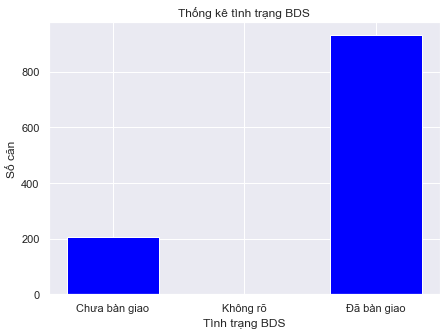

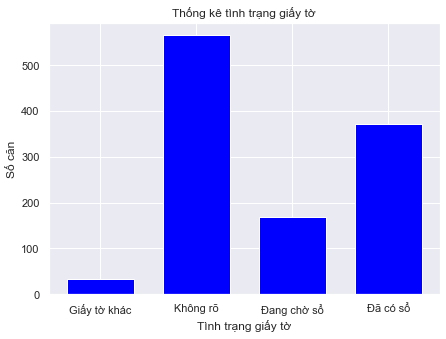

In [13]:
#Vẽ biểu đồ thống kê 
fig,ax=plt.subplots(figsize=(7, 5))
fig,ax1=plt.subplots(figsize=(7, 5))
ax.bar(p,f,width = 0.7, color='blue')
ax1.bar(p1,f1,width = 0.7, color='blue')
ax.set_title("Thống kê tình trạng BDS")
ax.set_xlabel('Tình trạng BDS')
ax.set_ylabel('Số căn')
ax1.set_title("Thống kê tình trạng giấy tờ")
ax1.set_xlabel('Tình trạng giấy tờ')
ax1.set_ylabel('Số căn')

**Nhận xét:** 
+ Theo tình trạng BDS: Đa số các căn hộ được rao bán đều đã được các chủ đầu tư bàn giao, tuy nhiên vẫn còn một số lượng các căn hộ vẫn chưa được bàn giao.
+ Theo tình trạng giấy tờ: Đa số các căn hộ được rao bán chiếm phần lớn là giấy tờ không rõ, tiếp đến là các căn hộ đã có sổ và còn lại là các căn hộ đang chờ được cấp sổ, giấy tờ khác.

- Phân tích với trường dữ liệu 'Tình trạng BDS'

**Ghi chú:** Tuy số lượng các căn hộ không rõ tình trạng BDS không nhiều, nhưng để chính xác hơn ta sẽ loại bỏ các dòng có tình trạng BDS là 'Không rõ' sau đó mới tiếp tục tiến hành phân tich.

In [14]:
df=house_df.copy()
index_BDS = df[ (df['TinhTrangBDS'] == 'Không rõ' )].index
df=df.drop(index_BDS , inplace=False)

Ta sẽ lấy 200 căn hộ có giá cao nhất trong dữ liệu hiện có ( tương đương khoảng 20% dữ liệu) và phân tích xem các căn hộ này sẽ thuộc về tình trạng BDS như thế nào

Text(0, 0.5, 'Số căn')

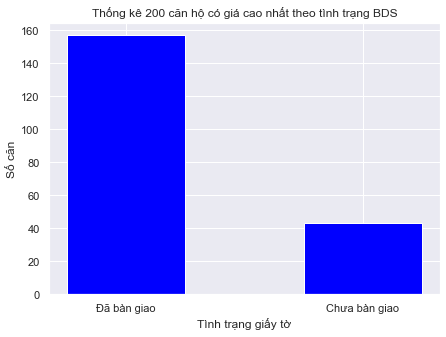

In [15]:
#Vẽ biểu đồ thống kê
x = df['Gia/m2'].sort_values(ascending=False)[:200]
x = df['TinhTrangBDS'][x.index].value_counts()
plt.figure(figsize=(7, 5))
plt.bar(x.keys(), x,width=0.5,color='blue');
plt.title("Thống kê 200 căn hộ có giá cao nhất theo tình trạng BDS")
plt.xlabel('Tình trạng giấy tờ')
plt.ylabel('Số căn')

**Nhận xét:** Các căn hộ có giá cao đa số đều đã được chủ đầu tư bàn giao.



- Tiếp tục với trường dữ liệu 'Tình trạng giấy tờ'

**Ghi chú:** Do số lượng giấy tờ pháp lí không rõ chiếm tỉ lệ khá cao nên để chính xác hơn ta sẽ loại bỏ các dòng có tình trạng giấy tờ là 'Không rõ' sau đó mới tiếp tục tiến hành phân tich.

In [16]:
df1=house_df.copy()
index_TTGT = df[ (df['TinhTrangGiayTo'] == 'Không rõ' )].index
df1=df1.drop(index_TTGT , inplace=False)

Tương tự như trên ta cũng sẽ lấy 200 căn hộ có giá cao nhất trong dữ liệu hiện có ( tương đương khoảng 20% dữ liệu) và phân tích xem các căn hộ này sẽ thuộc tình trạng giấy tờ như thế nào.

Text(0, 0.5, 'Số căn')

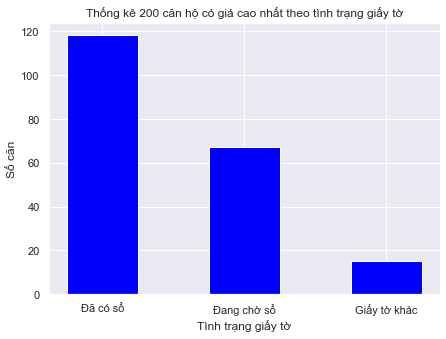

In [17]:
x = df1['Gia/m2'].sort_values(ascending=False)[:200]
x = df1['TinhTrangGiayTo'][x.index].value_counts()
plt.figure(figsize=(7, 5))
plt.bar(x.keys(), x,width=0.5,color='blue');
plt.title("Thống kê 200 căn hộ có giá cao nhất theo tình trạng giấy tờ")
plt.xlabel('Tình trạng giấy tờ')
plt.ylabel('Số căn')

**Nhận xét:** Tương tự như tình trạng BDS, các căn hộ đã có sổ sẽ có giá cao hơn so với các căn hộ đang chờ sổ hoặc giấy tờ khác

**Câu 4:** Vị trí khu vực nào trong TPHCM sẽ có giá bán căn hộ chung cư cao nhất?

+ Vị trí dự án luôn là một yếu tố then chốt để đảm bảo giá trị của một bất động sản. Một dự án có vị trí tốt cần phải đảm bảo những yếu tố: thuận tiện về giao thông khi di chuyển, kết nối với các khu vực xung quanh linh hoạt, hệ thống hạ tầng giao thông quanh khu vực phát triển,… 
+ Khi trả lời được câu hỏi này chúng ta sẽ biết được những khu vực nào trong TPHCM sẽ là vị trí “đắc địa” nhất khi lựa chọn mua chung cư, ngoài ra ta cũng có thể dựa vào đây để xác định được những khu vực tiềm năng phát triển để có thể đầu tư sinh lời từ những căn hộ này.


Đầu tiên ta sẽ coi xem các căn hộ chung cư được rao bán sẽ đến từ các khu vực nào và có số lượng là bao nhiêu.

In [18]:
data = house_df['Quan'].value_counts(dropna=True, sort=True)
data=data.sort_index()
p=data.index
f=data.values

Text(0.5, 0, 'Số căn')

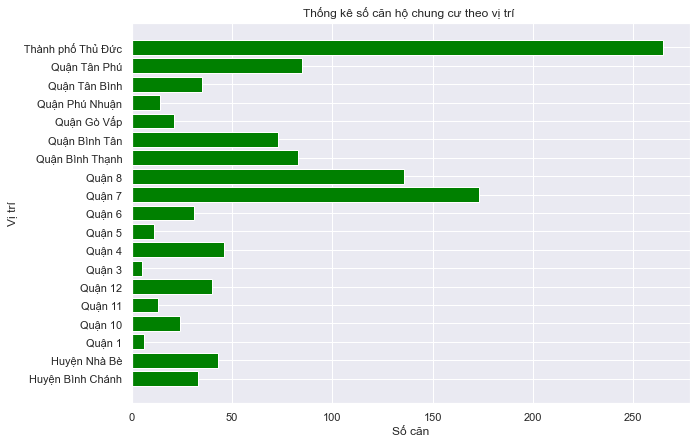

In [19]:
#Vẽ biểu đồ thống kê
plt.figure(figsize=(10, 7))
plt.barh(p,f,color='green')
plt.title("Thống kê số căn hộ chung cư theo vị trí ")
plt.ylabel('Vị trí')
plt.xlabel('Số căn')

**Nhận xét:** Các căn hộ chung cư được rao bán nhiều nhất đến từ các khu vực: TP Thủ Đức, Quận 7 và Quận 8

Text(0.5, 0, 'Số căn')

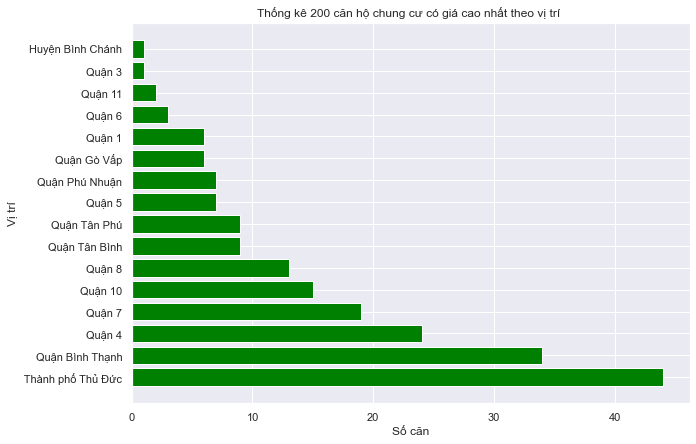

In [20]:
x = df['Gia/m2'].sort_values(ascending=False)[:200]
x = df['Quan'][x.index].value_counts()
plt.figure(figsize=(10, 7))
plt.barh(x.keys(),x,color='green')
plt.title("Thống kê 200 căn hộ chung cư có giá cao nhất theo vị trí ")
plt.ylabel('Vị trí')
plt.xlabel('Số căn')

**Nhận xét:** Các căn hộ có giá cao sẽ đến từ các khu vực: TP Thủ Đức, Quận Bình Thạnh và Quận 4

**Câu 5:** Tình trạng nội thất nào của căn hộ được rao bán (bàn giao thô, nội thất cao cấp, nội thất cơ bản,…) sẽ được ưa chuộng nhất?

+ Thông thường mỗi người sẽ có một sở thích, nhu cầu về các tiện nghi sinh hoạt và không gian sống khác nhau cho riêng mình. Và nếu khi mua các căn hộ chung cư đã được thiết kế sẵn và hoàn thiện đôi lúc nó sẽ không phù hợp với nhu cầu của tất cả mọi người dẫn đến việc không thoải mái khi mua và sử dụng. 
+ Thế nên khi trả lời được câu hỏi này, chúng ta sẽ biết được rằng liệu mọi người thích việc tự mình thiết kế hoàn toàn căn hộ chung cư theo ý thích của riêng mình bằng việc chấp nhận mua căn hộ chung cư đã bàn giao thô hay muốn tiết kiệm thời gian, chi phí xây dựng mà lựa chọn những căn hộ chung cư đã hoàn thiện nội thất trước đó để ở thay vì phải bỏ thời gian ra thiết kế lại từ đầu. Từ đó chúng ta sẽ dự đoán được nhu cầu và các phân khúc giá cả phù hợp cho từng loại hình căn hộ này.


In [21]:
df=house_df.copy()
df['TinhTrangNoiThat'][df['TinhTrangNoiThat'].isna()] = 'Không rõ'

Text(0, 0.5, 'Số căn')

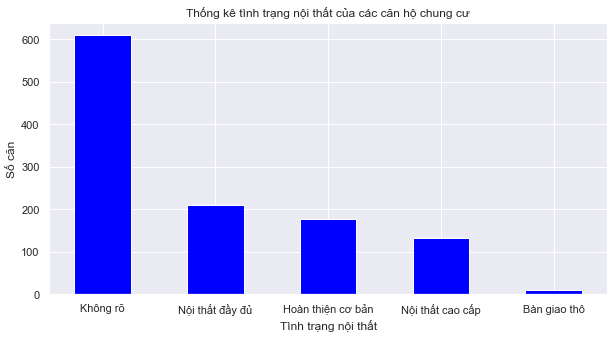

In [22]:
data = df['TinhTrangNoiThat'].value_counts(dropna=True, sort=True)
p=data.index
f=data.values
plt.figure(figsize=(10, 5))
plt.bar(p,f,color='blue',width=0.5)
plt.title("Thống kê tình trạng nội thất của các căn hộ chung cư")
plt.xlabel('Tình trạng nội thất')
plt.ylabel('Số căn')

In [23]:
index_TTNT = df[ (df['TinhTrangNoiThat'] == 'Không rõ' )].index
df=df.drop(index_TTNT , inplace=False)

Text(0.5, 0, 'Số căn')

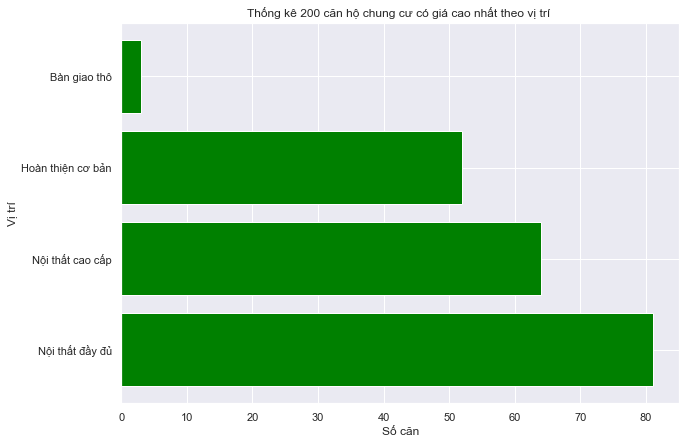

In [24]:
x = df['Gia/m2'].sort_values(ascending=False)[:200]
x = df['TinhTrangNoiThat'][x.index].value_counts()
plt.figure(figsize=(10, 7))
plt.barh(x.keys(),x,color='green')
plt.title("Thống kê 200 căn hộ chung cư có giá cao nhất theo vị trí ")
plt.ylabel('Vị trí')
plt.xlabel('Số căn')

**Câu 6:** Giá cả của một căn hộ chung cư có bị ảnh hưởng bởi phong thủy cụ thể là hướng ban công hay không?

+ Người Việt khi đi mua nhà thường có thói quen xem bói, xem phong thủy. Chính vì vậy khi xem xét các yếu tố ảnh hưởng đến giá nhà ở chung cư không thể bỏ qua yếu tố phong thủy đặc biệt là hướng ban công của căn hộ.  
+ Khi trả lời được câu hỏi này chúng ta sẽ biết được mọi người có thật sự quan tâm đến yếu tố phong thủy khi mua căn hộ chung cư và liệu theo quan niệm phong thủy thì các căn hộ có hướng phong thủy không tốt sẽ có giá thành khác biệt như thế nào so với các căn hộ có hướng phong thủy tốt hơn. Bên cạnh đó ta có thể làm rõ các quan niệm phong thủy để từ đó có các chính sách ưu tiên thích hợp khi mua, bán các căn hộ chung cư để có thể thu được kết quả tốt nhất.


In [25]:
test = house_df[house_df['Gia/m2'] < house_df['Gia/m2'].quantile(0.8)]

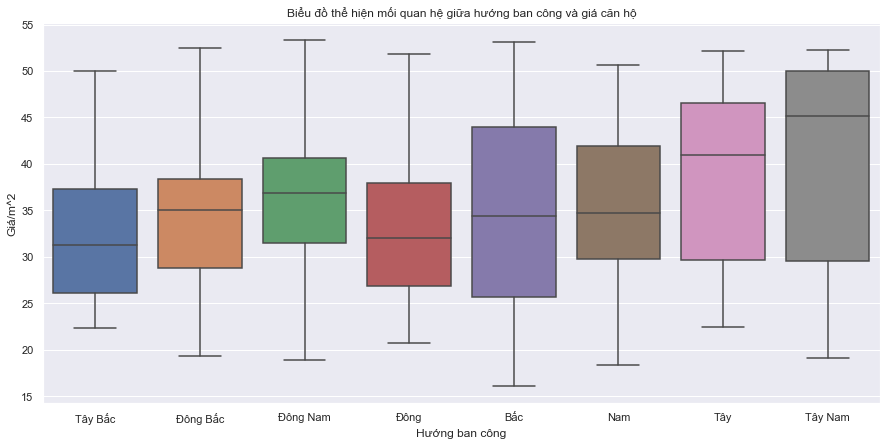

In [26]:
plt.rcParams['figure.figsize'] = (15, 7)
ax=sns.boxplot(x=test['HuongBanCong'], y=test['Gia/m2'])
ax.set_title('Biểu đồ thể hiện mối quan hệ giữa hướng ban công và giá căn hộ')
ax.set(xlabel="Hướng ban công", ylabel="Giá/m^2")
plt.show()

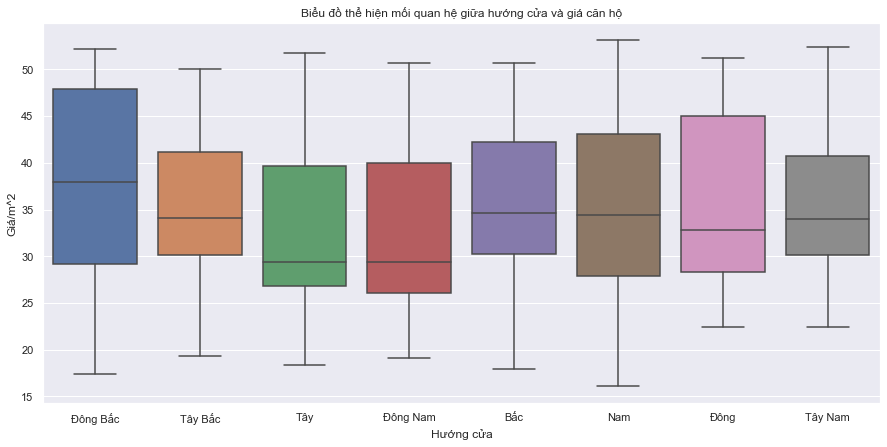

In [27]:
plt.rcParams['figure.figsize'] = (15, 7)
ax=sns.boxplot(x=test['HuongCua'], y=test['Gia/m2'])
ax.set_title('Biểu đồ thể hiện mối quan hệ giữa hướng cửa và giá căn hộ')
ax.set(xlabel="Hướng cửa", ylabel="Giá/m^2")
plt.show()